In [1]:
import pandas as pd 
observations = pd.read_csv('observations.csv')
observations_subset = observations.head(50)
observations_subset.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [2]:
species = pd.read_csv('species_info.csv')
species_subset = species.head(50)
species_subset.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


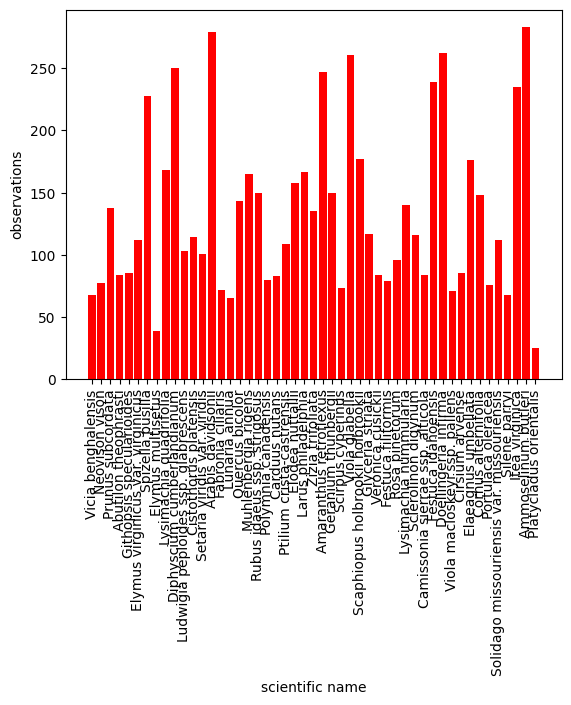

In [4]:
import matplotlib.pyplot as plt
names = observations_subset['scientific_name']
appearences = observations_subset['observations']
plt.bar(names,appearences,color='red')
plt.xlabel('scientific name')
plt.ylabel('observations')
plt.xticks(rotation=90)
plt.show()

{'Great Smoky Mountains National Park': 15, 'Yosemite National Park': 15, 'Bryce National Park': 11, 'Yellowstone National Park': 9}


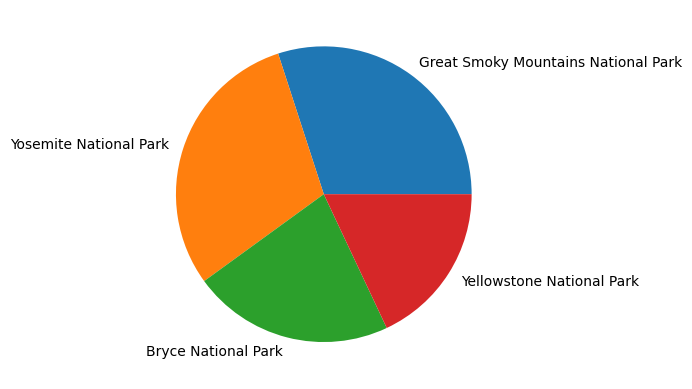

In [5]:
import matplotlib.pyplot as plt
species = observations_subset['park_name']
my_dict = {}
for x in species:
    if x in my_dict:
        my_dict[x] += 1
    else:
        my_dict[x] = 1
species_list = list(my_dict.keys())
occurences = list(my_dict.values())
print(my_dict)
plt.pie(occurences, labels=species_list,)
plt.show()